# US Students Dataset – Data Cleaning, Feature Extraction & ML Pipeline

**EduConnect Project** – Machine learning pipeline for study partner matching and student clustering.

This notebook covers:
1. **Data Loading & Exploration**
2. **Data Cleaning** – missing values, inconsistencies, format normalization
3. **Feature Extraction** – derived features from text columns
4. **Data Preprocessing** – encoding, scaling, train/test split
5. **Machine Learning Pipeline** – clustering and classification models
6. **Visualizations** – distributions, correlation heatmap, cluster plots, confusion matrix

## 1. Load Dependencies & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score, accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset (adjust path if running from different directory)
df = pd.read_csv('../public/us_students_dataset_1500.csv')
print(f'Shape: {df.shape}')
df.head()

Shape: (1500, 31)


,Registration Number,First Name,Middle Name,Last Name,Gender,Date of Birth,Nationality,Country of Residence,Phone Number,Email Address,...,Course Units,Technical Skills,Soft Skills,Research Interests,Professional Interests,Hobbies,Preferred Learning Style,Study Partners Preferences,Preferred Study Hours,CS and Data Science Interests
0,202291369,James,Sarah,Scott,Male,2003-07-04,United States,United States,(359) 420-6514,james.scott14@gmail.com,...,14,"Git, Java, R","Time Management, Communication, Teamwork, Crit...","Artificial Intelligence, Data Science, None, C...","ML Engineer, Data Scientist, AI Researcher","Reading, Hiking",Auditory,One-on-one,Morning,"None, AI"
1,202221231,Aurora,Sofia,Brooks,Female,2002-10-29,United States,United States,(780) 935-6155,aurora.brooks28@gmail.com,...,15,"Docker, Git, PyTorch, Cybersecurity, C++, SQL,...","Critical Thinking, Time Management, Problem-so...","Machine Learning, None","Software Engineer, ML Engineer, Cybersecurity ...","Photography, Hiking, Music",Visual,Online,Late night,"Data Science, NLP, Cybersecurity, AI, Computer..."
2,202252572,Rowan,Willow,Long,Male,2004-10-25,United States,United States,(780) 280-2403,rowan.long94@gmail.com,...,17,"Deep Learning, Java, Machine Learning, AWS, C+...","Time Management, Leadership, Communication, Pr...","None, NLP, Machine Learning, Cybersecurity","AI Researcher, Cybersecurity Analyst, ML Engin...","Gaming, Photography",Visual,One-on-one,Morning,"NLP, Machine Learning, None, Computer Vision, AI"
3,202103198,Theo,Brooklyn,Davis,Male,2001-10-04,United States,United States,(262) 612-6559,theo.davis14@gmail.com,...,11,"JavaScript, Cybersecurity, AWS, Docker","Problem-solving, Leadership, Communication, Ti...",NaN,Cybersecurity Analyst,"Reading, Photography, Cooking, Hiking, Music, ...",Auditory,Online,Late night,"Machine Learning, Data Science, AI, None"
4,202194851,Olivia,Olivia,King,Female,2004-03-14,United States,United States,(270) 809-2113,olivia.king87@gmail.com,...,9,"JavaScript, Git, Java, TensorFlow, Cybersecuri...","Communication, Leadership, Critical Thinking, ...","Machine Learning, NLP, Cybersecurity","AI Researcher, Software Engineer, Cybersecurit...","Cooking, Reading, Hiking, Gaming, Sports, Music",Auditory,One-on-one,Morning,"Cybersecurity, None"


## 2. Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Registration Number               1500 non-null   int64  
 1   First Name                        1500 non-null   object 
 2   Middle Name                       1500 non-null   object 
 3   Last Name                         1500 non-null   object 
 4   Gender                            1500 non-null   object 
 5   Date of Birth                     1500 non-null   object 
 6   Nationality                       1500 non-null   object 
 7   Country of Residence              1500 non-null   object 
 8   Phone Number                      1500 non-null   object 
 9   Email Address                     1500 non-null   object 
 10  Home Address                      1500 non-null   object 
 11  City                              1500 non-null   object 
 12  State 

In [4]:
# Missing values
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Research Interests                  368
Previous GPA (historic tracking)    216
CS and Data Science Interests        43
dtype: int64

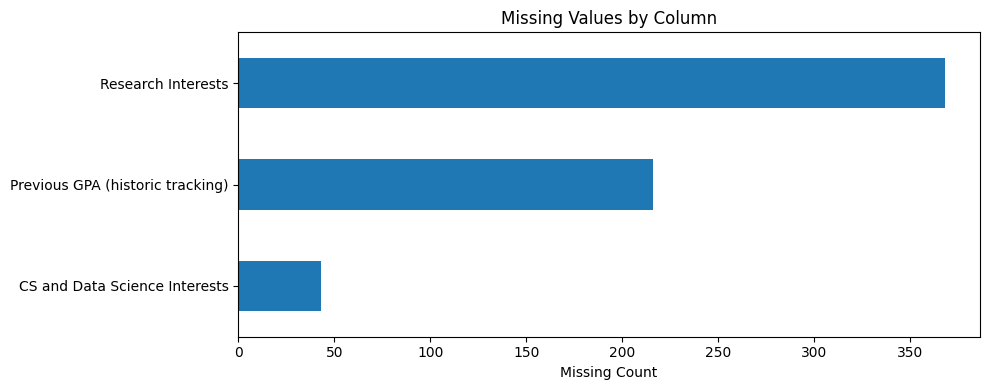

In [5]:
# Visualize missing values
missing_viz = df.isnull().sum()
missing_viz = missing_viz[missing_viz > 0].sort_values(ascending=True)
if len(missing_viz) > 0:
    plt.figure(figsize=(10, max(4, len(missing_viz) * 0.3)))
    missing_viz.plot(kind='barh')
    plt.xlabel('Missing Count')
    plt.title('Missing Values by Column')
    plt.tight_layout()
    plt.show()

In [6]:
# Check for 'None' strings
text_cols = ['Technical Skills', 'Soft Skills', 'Research Interests', 'Professional Interests', 
             'Hobbies', 'Preferred Learning Style', 'Study Partners Preferences', 
             'Preferred Study Hours', 'CS and Data Science Interests']
for col in text_cols:
    if col in df.columns:
        none_count = (df[col].astype(str).str.strip().str.lower() == 'none').sum()
        if none_count > 0:
            print(f"{col}: {none_count} 'None' values")

## 3. Data Cleaning

In [7]:
def clean_text_column(series):
    """Replace 'None' with empty string, strip whitespace."""
    return series.astype(str).replace('none', np.nan, case=False).replace('nan', np.nan).fillna('').str.strip()

# Apply to text columns
for col in text_cols:
    if col in df.columns:
        df[col] = clean_text_column(df[col])

df[text_cols].head()

TypeError: NDFrame.replace() got an unexpected keyword argument 'case'

In [ ]:
# Clean numeric columns
df['Current GPA / CGPA'] = pd.to_numeric(df['Current GPA / CGPA'], errors='coerce')
df['Credits Completed'] = pd.to_numeric(df['Credits Completed'], errors='coerce')
df['Credits Remaining'] = pd.to_numeric(df['Credits Remaining'], errors='coerce')
df['Courses Enrolled Per Semester'] = pd.to_numeric(df['Courses Enrolled Per Semester'], errors='coerce')
df['Course Units'] = pd.to_numeric(df['Course Units'], errors='coerce')

# Parse Previous GPA – take first value if semicolon-separated
def parse_previous_gpa(val):
    if pd.isna(val) or str(val).strip().lower() == 'none':
        return np.nan
    s = str(val).split(';')[0].strip()
    try:
        return float(s)
    except:
        return np.nan

df['Previous GPA (parsed)'] = df['Previous GPA (historic tracking)'].apply(parse_previous_gpa)

df[['Current GPA / CGPA', 'Credits Completed', 'Credits Remaining']].describe()

In [ ]:
# Fill remaining numeric NaN with median
numeric_cols = ['Current GPA / CGPA', 'Credits Completed', 'Credits Remaining', 'Courses Enrolled Per Semester', 'Course Units']
for col in numeric_cols:
    if col in df.columns and df[col].isna().any():
        df[col] = df[col].fillna(df[col].median())

df['Previous GPA (parsed)'] = df['Previous GPA (parsed)'].fillna(df['Current GPA / CGPA'])

In [ ]:
# Distribution of key numeric and categorical features
fig, axes = plt.subplots(2, 3, figsize=(14, 8))

# GPA distribution
axes[0, 0].hist(df['Current GPA / CGPA'].dropna(), bins=30, color='#4ECDC4', edgecolor='white')
axes[0, 0].set_xlabel('GPA')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Current GPA Distribution')

# Credits completed
axes[0, 1].hist(df['Credits Completed'].dropna(), bins=30, color='#FF6B35', edgecolor='white')
axes[0, 1].set_xlabel('Credits Completed')
axes[0, 1].set_title('Credits Completed Distribution')

# Gender distribution
df['Gender'].value_counts().plot(kind='bar', ax=axes[0, 2], color=['#764ba2', '#4ECDC4'])
axes[0, 2].set_xlabel('Gender')
axes[0, 2].set_title('Gender Distribution')
axes[0, 2].tick_params(axis='x', rotation=0)

# Preferred Learning Style
df['Preferred Learning Style'].value_counts().plot(kind='barh', ax=axes[1, 0], color='#667eea', alpha=0.8)
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_title('Preferred Learning Style')

# Preferred Study Hours
df['Preferred Study Hours'].value_counts().plot(kind='barh', ax=axes[1, 1], color='#FFD93D', alpha=0.8)
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_title('Preferred Study Hours')

# Top universities
df['University'].value_counts().head(10).plot(kind='barh', ax=axes[1, 2], color='#10B981', alpha=0.8)
axes[1, 2].set_xlabel('Count')
axes[1, 2].set_title('Top 10 Universities')
plt.tight_layout()
plt.show()

## 4. Feature Extraction

In [1]:
def count_items(series, sep=','):
    """Count non-empty items in comma-separated string, excluding 'None'."""
    def _count(s):
        if pd.isna(s) or str(s).strip() == '':
            return 0
        items = [x.strip() for x in str(s).split(sep) if x.strip() and x.strip().lower() != 'none']
        return len(items)
    return series.apply(_count)

# Count of skills, interests, etc.
df['technical_skills_count'] = count_items(df['Technical Skills'])
df['soft_skills_count'] = count_items(df['Soft Skills'])
df['research_interests_count'] = count_items(df['Research Interests'])
df['professional_interests_count'] = count_items(df['Professional Interests'])
df['hobbies_count'] = count_items(df['Hobbies'])
df['cs_interests_count'] = count_items(df['CS and Data Science Interests'])

df[['technical_skills_count', 'cs_interests_count', 'soft_skills_count']].describe()

NameError: name 'df' is not defined

In [ ]:
# Binary: has ML/AI interest (for classification target)
ml_keywords = ['machine learning', 'ml', 'ai', 'artificial intelligence', 'deep learning', 'nlp', 'computer vision', 'data science']
def has_ml_interest(s):
    if pd.isna(s) or str(s).strip() == '':
        return 0
    s_lower = str(s).lower()
    return 1 if any(kw in s_lower for kw in ml_keywords) else 0

df['has_ml_interest'] = df['CS and Data Science Interests'].apply(has_ml_interest)

# Credit progress ratio
df['credit_progress'] = df['Credits Completed'] / (df['Credits Completed'] + df['Credits Remaining'] + 1e-6)

print('has_ml_interest distribution:')
print(df['has_ml_interest'].value_counts())

In [ ]:
# Encode categorical columns for ML
categorical_cols = ['Gender', 'Preferred Learning Style', 'Study Partners Preferences', 'Preferred Study Hours']
label_encoders = {}

for col in categorical_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = df[col].astype(str).fillna('')
        valid = df[col] != ''
        df.loc[valid, col + '_encoded'] = le.fit_transform(df.loc[valid, col].astype(str))
        df[col + '_encoded'] = df[col + '_encoded'].fillna(-1).astype(int)
        label_encoders[col] = le

## 5. Data Preprocessing – Feature Matrix

In [2]:
# Distribution of extracted count features and target
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
df['technical_skills_count'].hist(ax=axes[0], bins=15, color='#667eea', edgecolor='white')
axes[0].set_xlabel('Technical Skills Count')
axes[0].set_ylabel('Students')
axes[0].set_title('Technical Skills per Student')
df['cs_interests_count'].hist(ax=axes[1], bins=15, color='#4ECDC4', edgecolor='white')
axes[1].set_xlabel('CS/Data Science Interests Count')
axes[1].set_title('CS Interests per Student')
df['has_ml_interest'].value_counts().plot(kind='pie', ax=axes[2], autopct='%1.1f%%', 
    labels=['No ML Interest', 'ML Interest'], colors=['#FF6B35', '#10B981'], startangle=90)
axes[2].set_ylabel('')
axes[2].set_title('ML/AI Interest (Target)')
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

In [ ]:
# Build feature matrix for ML
feature_cols = [
    'Current GPA / CGPA', 'Previous GPA (parsed)', 'Credits Completed', 'Credits Remaining',
    'Courses Enrolled Per Semester', 'Course Units', 'credit_progress',
    'technical_skills_count', 'soft_skills_count', 'research_interests_count',
    'professional_interests_count', 'hobbies_count', 'cs_interests_count',
    'Gender_encoded', 'Preferred Learning Style_encoded', 
    'Study Partners Preferences_encoded', 'Preferred Study Hours_encoded'
]

feature_cols = [c for c in feature_cols if c in df.columns]
X = df[feature_cols].copy()

# Remove any remaining NaNs
X = X.fillna(X.median())

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=feature_cols, index=X.index)

print('Feature matrix shape:', X_scaled.shape)
X_scaled.head()

In [ ]:
# Correlation heatmap of features
plt.figure(figsize=(12, 10))
corr = X_scaled[feature_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
sns.heatmap(corr, mask=mask, annot=False, cmap='RdYlBu_r', center=0, 
            square=True, linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Heatmap')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 6. Machine Learning Pipeline

### 6.1 Clustering (K-Means) – Study Group Discovery

In [3]:
# Elbow method to choose k
inertias = []
silhouettes = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X_scaled, km.labels_))

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].plot(list(K_range), inertias, 'bo-')
axes[0].set_xlabel('k')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method')
axes[1].plot(list(K_range), silhouettes, 'go-')
axes[1].set_xlabel('k')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score')
plt.tight_layout()
plt.show()

NameError: name 'KMeans' is not defined

In [ ]:
# Fit final K-Means (k=5 as typical for study group diversity)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

print(f'Silhouette Score: {silhouette_score(X_scaled, df["cluster"]):.3f}')
print('\nCluster sizes:')
print(df['cluster'].value_counts().sort_index())

In [ ]:
# Cluster profiles (mean features per cluster)
cluster_profiles = df.groupby('cluster')[feature_cols].mean()
cluster_profiles.round(2)

In [ ]:
# PCA 2D visualization of clusters
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
colors = ['#FF6B35', '#4ECDC4', '#764ba2', '#FFD93D', '#10B981']

scatter = axes[0].scatter(df['pca1'], df['pca2'], c=df['cluster'], cmap='viridis', alpha=0.6, s=20)
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
axes[0].set_title('K-Means Clusters (PCA 2D Projection)')
plt.colorbar(scatter, ax=axes[0], label='Cluster')

# Cluster sizes bar chart
cluster_counts = df['cluster'].value_counts().sort_index()
axes[1].bar(cluster_counts.index.astype(str), cluster_counts.values, color=colors[:len(cluster_counts)])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Number of Students')
axes[1].set_title('Cluster Sizes')
plt.tight_layout()
plt.show()

In [ ]:
# Box plots: key features by cluster
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
key_features = ['Current GPA / CGPA', 'technical_skills_count', 'cs_interests_count', 'credit_progress']
for ax, feat in zip(axes.flat, key_features):
    if feat in df.columns:
        sns.boxplot(data=df, x='cluster', y=feat, palette='viridis', ax=ax)
        ax.set_xlabel('Cluster')
        ax.set_ylabel(feat)
        ax.set_title(f'{feat} by Cluster')
plt.tight_layout()
plt.show()

### 6.2 Classification – ML/AI Interest Prediction

In [ ]:
y = df['has_ml_interest']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred):.3f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names=['No ML Interest', 'ML Interest']))

In [ ]:
# Feature importance
imp = pd.DataFrame({'feature': feature_cols, 'importance': clf.feature_importances_})
imp = imp.sort_values('importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(imp['feature'], imp['importance'])
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, 
            xticklabels=['No ML Interest', 'ML Interest'],
            yticklabels=['No ML Interest', 'ML Interest'])
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix – ML Interest Prediction')
plt.tight_layout()
plt.show()

### 6.3 Summary

In [ ]:
print('=== PIPELINE SUMMARY ===')
print(f'Dataset: {df.shape[0]} rows, {df.shape[1]} columns (after cleaning)')
print(f'Features used: {len(feature_cols)}')
print(f'Clustering: K-Means k=5, Silhouette={silhouette_score(X_scaled, df["cluster"]):.3f}')
print(f'Classification: RandomForest, Accuracy={accuracy_score(y_test, y_pred):.3f}')
print('\nCluster assignments saved in df["cluster"] for study group recommendations.')